In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [2]:
df_loan = pd.read_csv('/Users/mxfmeng/PycharmProjects/GraduationDesign/dataset/loan_new.csv')
df_loan.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,1,0.0
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,0,1.0
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,11,0.0
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,9,0.0
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,9,0.0
5,5000.0,0,7.90,156.46,5,4,1,36000.0,1,13,0.0
6,7000.0,1,15.96,170.08,3,9,1,47004.0,0,2,0.0
7,3000.0,0,18.64,109.43,1,10,1,48000.0,1,0,0.0
8,5600.0,1,21.28,152.39,0,5,3,40000.0,1,11,1.0
9,5375.0,1,12.69,121.45,4,1,1,15000.0,2,9,1.0


# 1 贷款等级、房屋所有类型、贷款目的

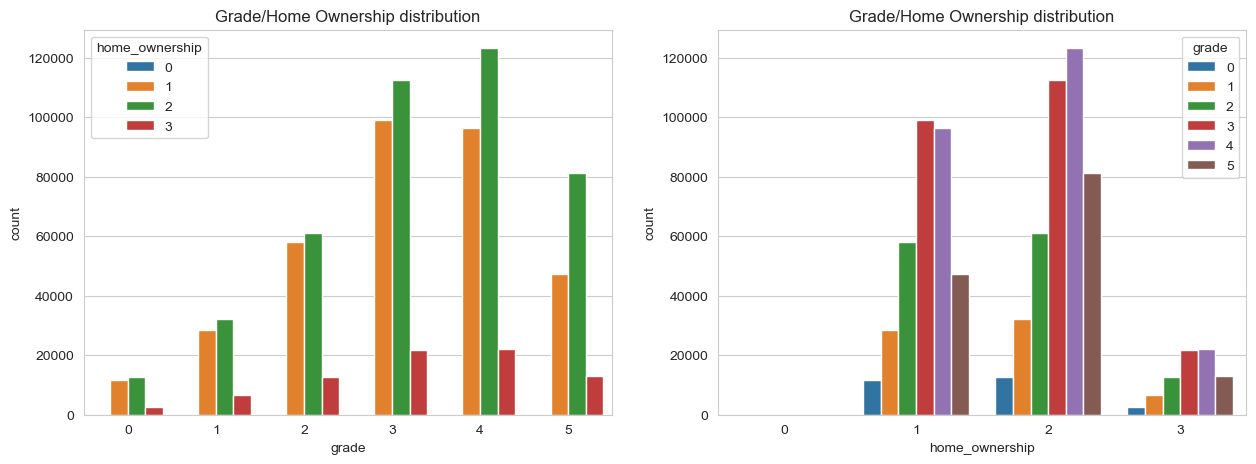

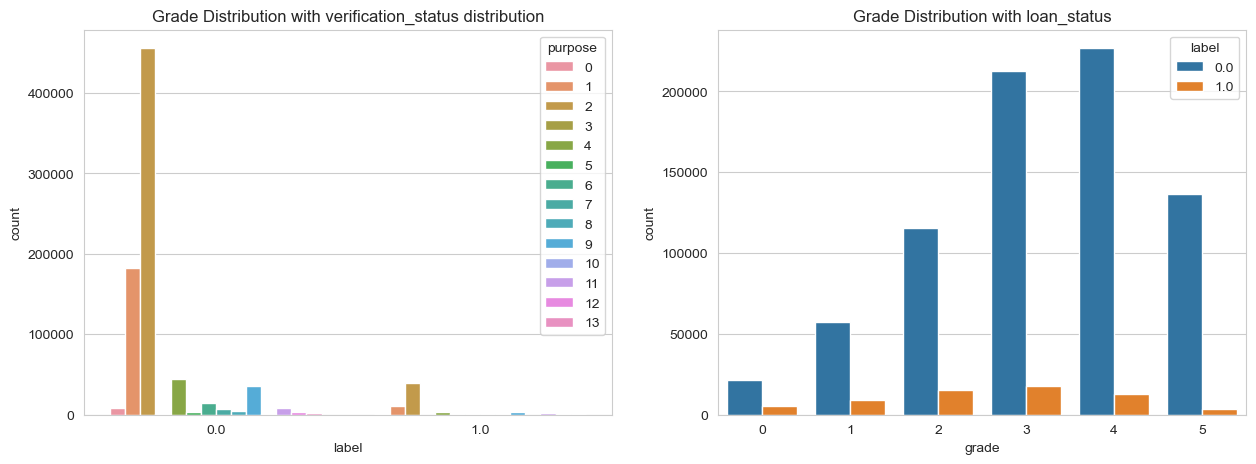

In [3]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df_loan, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df_loan, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

## Analysis :
1. 与低等级相比，高等级的借款人数量将很少(1~5贷款等级从大到小，0为其他)--grade
2. 无论标签为0还是1，大多数借款人的目标都是债务合并--purpose
3. 能够完成贷款(0)的等级最多的是4级，而未能完成贷款(1)的最多的是3级

# 2 贷款金额与贷款目的

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

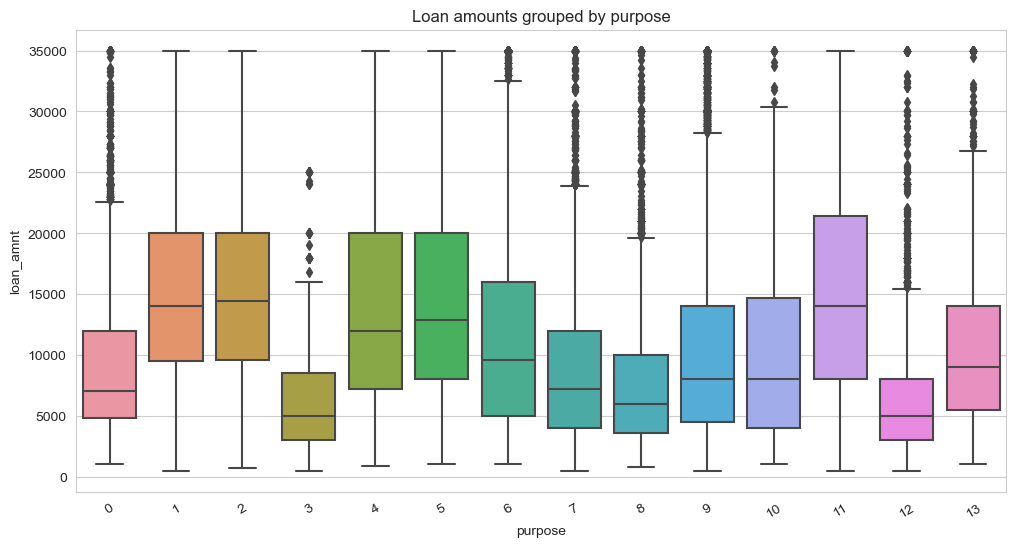

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_loan)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

## Analysis:
贷款目的是：信用卡、中小微企业业务、债务合并、房屋装修和买房，的五类贷款中，平均贷款金额最高

# 3贷款金额、贷款期数、房屋所有状况

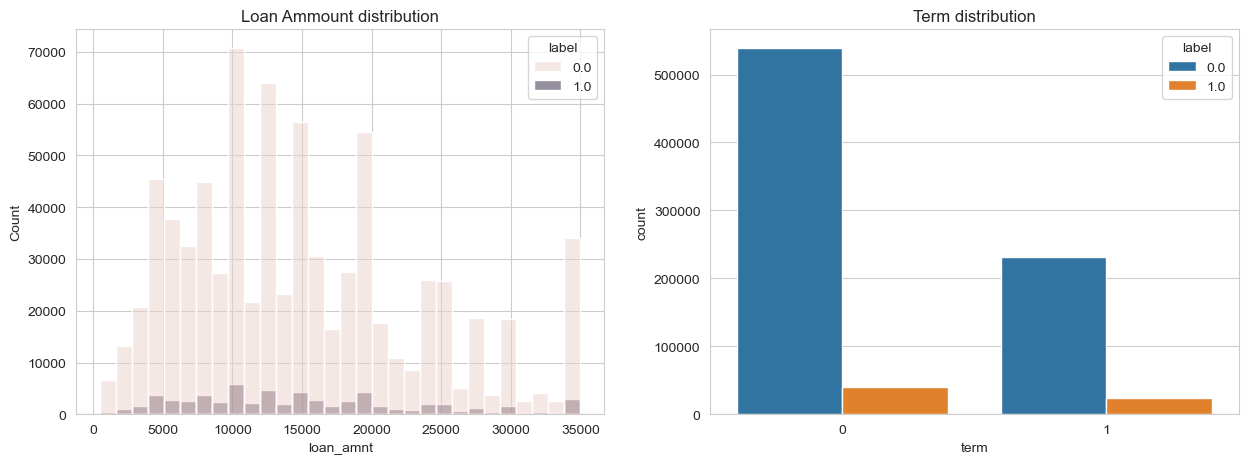

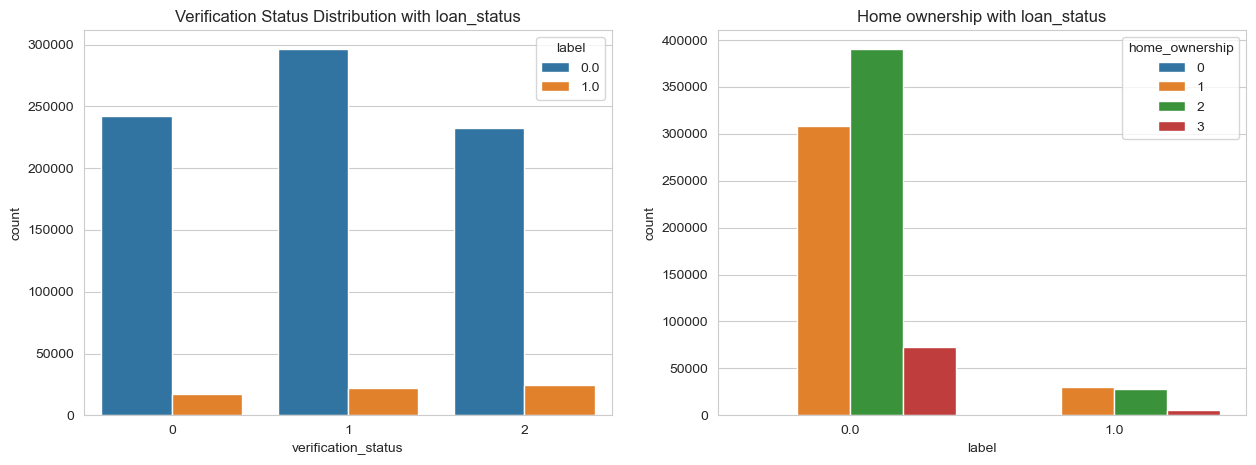

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_loan, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df_loan, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df_loan, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

## Analysis :
图1：贷款金额的分布情况
图2：贷款期数分布情况（后续用百分比表示）
图3：认证状态分布（后续用百分比表示）
图4：房屋所有权分布情况（后续用百分比表示）

# 3变量之间相关性分析

Text(0.5, 1.0, 'Correlations Heatmap')

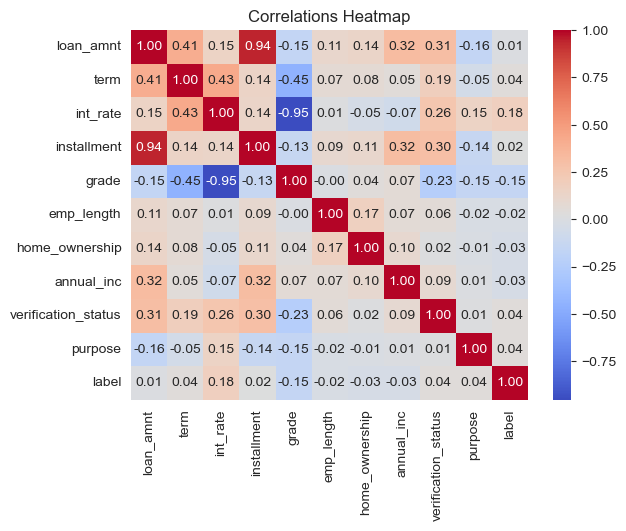

In [11]:
correlation_matrix = df_loan.corr()
# correlation_matrix = df_loan[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','label']].corr() # 有些列数据未处理成float类型，暂不参与相关性计算  verification_status, purpose,term
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlations Heatmap')
#plt.show()

## Analysis :
贷款金额在很大程度上取决于借款人的年收入

# 以下内容尚未完成(百分比画图)

In [7]:
tmpColumns =['grade','label']
df_gradeAndLabel = df_loan[tmpColumns]
df_gradeAndLabel.head(10)

,grade,label
0,4,0.0
1,3,1.0
2,3,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,3,0.0
7,1,0.0
8,0,1.0
9,4,1.0


In [8]:
df_gradeAndLabel.info()
value_counts = df_gradeAndLabel['label'].value_counts()
filtered_df = df_gradeAndLabel[df_gradeAndLabel['label'] == 0]
label0_prop = filtered_df['grade'].value_counts()/value_counts[0]
filtered_df = df_gradeAndLabel[df_gradeAndLabel['label'] == 1]
label1_prop = filtered_df['grade'].value_counts()/value_counts[1]
dataDic = {}
i = 0
for tmpSeries in [label0_prop,label1_prop]:
    tmpList = []
    for g in range(0,6):
        tmpList.append(tmpSeries[g])
    dataDic[i]=tmpList
    i += 1
prop_Df = pd.DataFrame(dataDic)
prop_Df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842554 entries, 0 to 842553
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   grade   842554 non-null  int64  
 1   label   834725 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 12.9 MB


,0,1
0,0.028067,0.085061
1,0.074443,0.146095
2,0.150068,0.235299
3,0.276155,0.282082
4,0.294223,0.197963
5,0.177044,0.053501


In [9]:
gradeList = range(0,6)
labelList = [0,1]
for i in range(1,11):
    tmpList = [gradeList[i%5],i/5]
    value =


SyntaxError: invalid syntax (4257662829.py, line 5)